In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Load an Image

In [13]:
def read_file(filename):
  img=cv2.imread(filename)
  img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

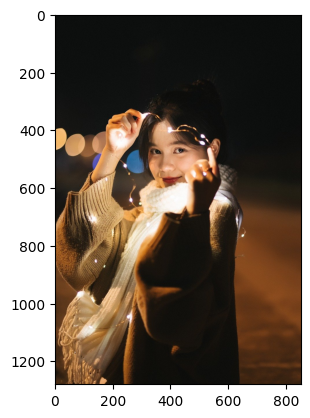

In [14]:
filename="C:\Cartoonifying an image\woman-8509281_1280.jpg"
img = read_file(filename)

org_img=np.copy(img)

Create Edge Mask

In [15]:
def edge_mask(img,line_size,blur_value):
  """
  input:Input Image
  output:Edges of Image
  """
  gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray,blur_value)

  edges=cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)

  return edges

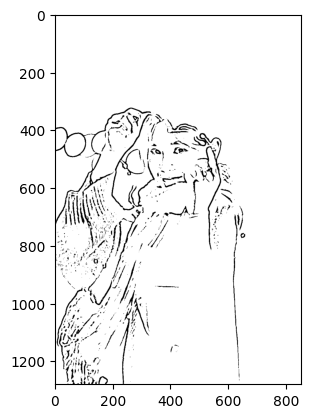

In [16]:
line_size, blur_value = 9,7
edges = edge_mask(img,line_size,blur_value)
plt.imshow(edges, cmap='gray')
plt.show()

Reduce the Color Palette

In [17]:
def color_quantization(img, k):

  #Transform the image
  data = np.float32(img).reshape((-1,3))

  #Determine Criteria
  criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

  #Implementing K-Means

  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)

  result = center[label.flatten()]
  result = result.reshape(img.shape)

  return result

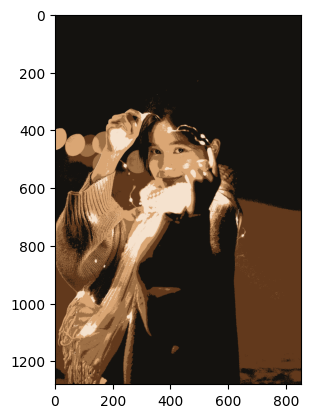

In [18]:
img = color_quantization(img, k=5)

plt.imshow(img)
plt.show()

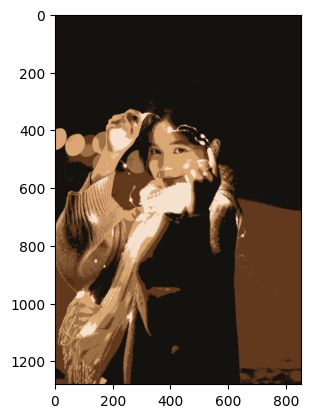

In [19]:
#Reduce the noise
blurred = cv2.bilateralFilter(img, d=3, sigmaColor=200, sigmaSpace=200)
plt.imshow(blurred)
plt.show()

Combine Edge Mask with the quantized image

In [20]:
def Cartoon():
  c= cv2.bitwise_and(blurred, blurred, mask = edges)
  plt.imshow(c)
  plt.title("Caartoonified image")
  plt.show()

  plt.imshow(org_img)
  plt.title("original image")
  plt.show()

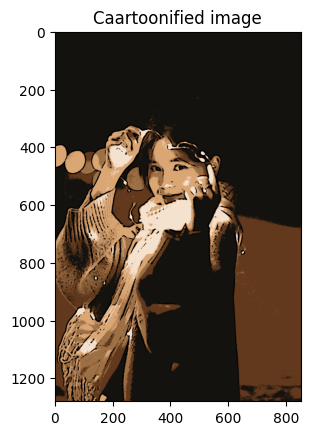

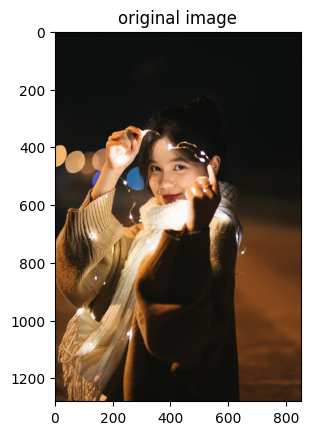

In [21]:
Cartoon()